# Calculo tiempo de degradación del modelo

https://ntrs.nasa.gov/api/citations/20170002430/downloads/20170002430.pdf

Se utilizan algunas de las consideraciones del estudio anterior.

Como un flujo de de 3.000 partículas/cm^2(10mins)

In [64]:
import numpy as np
import matplotlib.pyplot as plt

MFTF = 5*10**6
R = 0.7
fluencia = -MFTF*np.log(R)
print(f'Fluencia para alcanzar una fiabilidad de {R*100:.2f}% es de {fluencia:.3e} partículas/cm^2')

Fluencia para alcanzar una fiabilidad de 70.00% es de 1.783e+06 partículas/cm^2


In [68]:
flujo_promedio = 3000 #particulad/cm^2/10mins
flujo_por_min = flujo_promedio/10
T_total = fluencia/(flujo_por_min)
print(f'1 evento cada {(MFTF/flujo_por_min)/(60*24):.2f} días')
print(f'Se necesitan  {T_total/(60*24):.2f} días exposición continua para alcanzar una fiabilidad {R*100:.2f}% en el microprocesador')

1 evento cada 11.57 días
Se necesitan  4.13 días exposición continua para alcanzar una fiabilidad 70.00% en el microprocesador


In [73]:
SEE_modelo = 650*10**3
Flujo_total = MFTF*SEE_modelo
T_modelo = Flujo_total/(flujo_promedio*10)
print(f'Total de partículas {Flujo_total:.3e} para obtener # {SEE_modelo: .3e}, en {T_modelo/(60*24*365):.2f} años')

Total de partículas 3.250e+12 para obtener #  6.500e+05, en 206.11 años


15768.0
0.7295261975589648


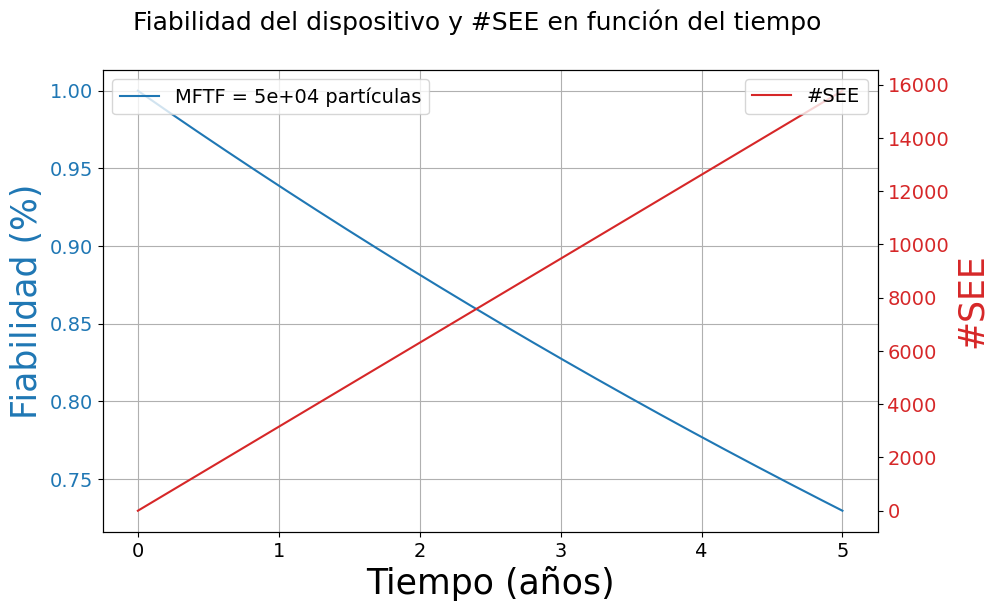

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Configurar el tamaño de la fuente global
plt.rcParams.update({'font.size': 25})

# Datos iniciales
MFTF = 5 * 10**4  # Mean Time To Failure (partículas)
tasa_particulas = 300/60 # partículas/segundo/cm^2
sigma_SEE = 1 / MFTF  # SEE/partícula
lambda_SEE = tasa_particulas * sigma_SEE  # SEE/segundo/cm^2
# Tiempo total en segundos (5 años)
tiempo_total = 5 * 365 * 24 * 3600

# Generar puntos de tiempo
tiempo = np.linspace(0, tiempo_total, 1000)  # 1000 puntos en el tiempo de 0 a 5 años

# Calcular el número total de SEE en función del tiempo
phi = lambda_SEE * tiempo
print(phi[-1])
# Calcular la fiabilidad en función del tiempo
R = np.exp(-phi / MFTF)
print(R[-1])
# Crear el plot en modo axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primer gráfico: Fiabilidad en función del tiempo
color = 'tab:blue'
ax1.set_xlabel('Tiempo (años)', fontsize=25)
ax1.set_ylabel('Fiabilidad (%)', color=color, fontsize=25)
ax1.plot(tiempo / (365 * 24 * 3600), R, label=f'MFTF = {MFTF:.0e} partículas', color=color)
ax1.tick_params(axis='y', labelcolor=color, labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.legend(loc='upper left', fontsize=14)
ax1.grid(True)

# Segundo gráfico: #SEE en función del tiempo
ax2 = ax1.twinx()  # Instancia de un segundo eje que comparte el mismo eje x
color = 'tab:red'
ax2.set_ylabel('#SEE', color=color, fontsize=25)
ax2.plot(tiempo / (365 * 24 * 3600), phi, label=f'#SEE', color=color)
ax2.tick_params(axis='y', labelcolor=color, labelsize=14)
ax2.legend(loc='upper right', fontsize=14)

# Título del gráfico
fig.suptitle('Fiabilidad del dispositivo y #SEE en función del tiempo', fontsize=18)

# Guardar y mostrar el plot
plt.savefig('fiabilidad_numSEE.png')
plt.show()
